## Data Mining for Networks

Yana RAGOZINA - Thomas PAUL

SI5 IAID FISA

In [1]:
import numpy as np

## Assignment 1

### Exercise 1

Gradient descent algorithm

In [2]:
def f(x):
    return 2*x**4 - 4*x**3 + 3*x**2 + 4*x - 3

In [3]:
## 1. derivative
def der_f(x):
    return 8*x**3 - 12*x**2 + 6*x + 4

In [4]:
## 2. gradient descent algorithm

alpha = 0.1

def gradient_descent(x):
    x = x - alpha * der_f(x)
    return x

In [5]:
## 3. 2 steps of gradient descent starting from x = 0 and from x = 10

## case 1 : x = 0

x = 0

# step 1:
x = gradient_descent(x)

print("x = 0, step 1 : ", x)

# step 2:
x = gradient_descent(x)

print("x = 0, step 2 : ", x)


## case 2 : x = 10

x = 10

# step 1:
x = gradient_descent(x)

print("x = 10, step 1 : ", x)

# step 2:
x = gradient_descent(x)

print("x = 10, step 2 : ", x)

x = 0, step 1 :  -0.4
x = 0, step 2 :  -0.31679999999999997
x = 10, step 1 :  -676.4000000000001
x = 10, step 2 :  248120326.78720012


We can observe the influence of the initial parameter initialization for the graident descent algorithm.

The descent is slower with theta = 0 and it explodes by the end of the 2nd step for theta = 10.

Therefore, we would prefer initializing theta = 0 instead of theta = 10 if we want to achieve the global minimum. Slower, this initialization has less risk for the descent to fluctuate or even diverge without ever reaching a minimum.

### Exercise 2

Linear regression and gradient descent

#### Example 1 - linear samples

To modelize a linear regression function we first start by giving a small dataset of scattered points.

We choose a set of points that are linearly and proportionally distributed in the 2-D space according to the y = x equation. Therefore, the model we seek to obtain should be as close as possible to a linear function y = x.

We also choose to set the learning rate (alpha) to 0.001 as far as it gave the best experimental results after numerous tests. In fact, choosing alpha bigger implies a higher risk of diverging gradient descent. With alpha = 0.1 we obtained diverging gradient descent over 50 epochs with the theta parameters reaching exponential values. With the chosen theta value, the gradient descent converges sufficiently well.

In [102]:
alpha = 0.001

X = np.array([1, 2, 3, 4, 8, 15, 30, 37, 55, 71, 99])
y_true = np.array([1, 2, 3, 4, 8, 15, 30, 37, 55, 71, 99])

#random initial parameter initialization
t0 = 1
t1 = 5

nb_epochs = 50

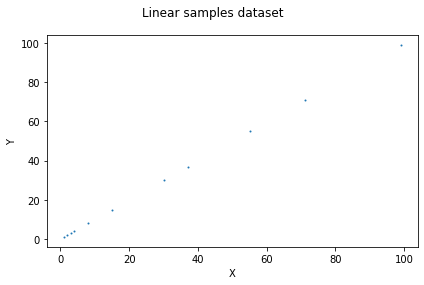

In [103]:
from matplotlib import pyplot as plt
# plot the initial distribution
fig, axs = plt.subplots(1, 1)
fig.suptitle('Linear samples dataset')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
plt.tight_layout()
plt.show()

Below are the definitions for the linear regression function.

In [138]:
# linear function initialization
def h_theta(theta0, theta1, j):
    return theta0 + theta1 * j

##### 1. simultaneous updates

We first define the linear regression function using simultaneous updates for the gradient descent.

In this section we implement and test three types of the simultaneous update gradient descent on the previously defined dataset : mini-batch (using several random samples from the dataset), batch (using the whole dataset) and stochastic (training on one random sample for each epoch).

In [139]:
#linear regression function for the simultaneous update gradient descent
def linear_regression_sim(theta0, theta1, x, y):

    #predicted values for the current theta parameters
    y_pred = []

    #calculate the estimated values
    for i in range(len(x)):
        y_pred.append(h_theta(theta0, theta1, x[i]))

    #simultaneous parameter update
    theta0 = theta0 - alpha * (np.sum(np.array(y_pred) - y) / len(x))
    theta1 = theta1 - alpha * (np.sum((np.array(y_pred) - y) * x) / len(x))

    return theta0, theta1


1. a. mini-batch gradient descent

In [106]:
# mini-batch gradient descent

#create a random batch 
batch_size = 5 #size chosen semi-randomly, based on the whole dataset size proportions
random_indices = np.random.choice(len(X), batch_size) # retrieve random samples
X_batch = X[random_indices]
y_batch = y_true[random_indices]

# calculate gradient descent
for i in range(nb_epochs):
    t0, t1 = linear_regression_sim(t0, t1, X_batch, y_batch)
    #display the updated parameter values
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.9398  theta1 =  3.1532
epoch  1  theta0 =  0.90699284  theta1 =  2.1531253599999998
epoch  2  theta0 =  0.8890195918320001  theta1 =  1.6115704510879998
epoch  3  theta0 =  0.8790793295640656  theta1 =  1.3183136945305822
epoch  4  theta0 =  0.873489207555449  theta1 =  1.1595156483580273
epoch  5  theta0 =  0.8702548867521948  theta1 =  1.0735298411382301
epoch  6  theta0 =  0.8682963902165968  theta1 =  1.0269734015729883
epoch  7  theta0 =  0.8670288874830999  theta1 =  1.0017687970773541
epoch  8  theta0 =  0.866135680398872  theta1 =  0.988126660481176
epoch  9  theta0 =  0.8654452701433517  theta1 =  0.9807458419108941
epoch  10  theta0 =  0.8648647864129271  theta1 =  0.976755656317583
epoch  11  theta0 =  0.8643439379130139  theta1 =  0.9746015668852186
epoch  12  theta0 =  0.8638554907851996  theta1 =  0.9734417589706759
epoch  13  theta0 =  0.8633846972616485  theta1 =  0.9728203720984854
epoch  14  theta0 =  0.8629235710573292  theta1 =  0.9724905481579

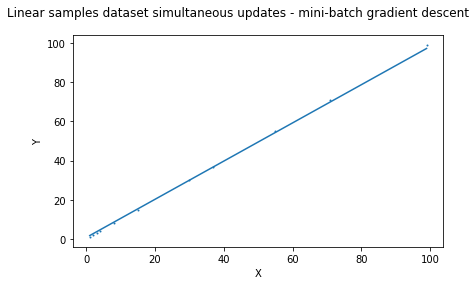

In [107]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Linear samples dataset simultaneous updates - mini-batch gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

We observe a correct parameter convergence and sufficiently correct theta values : the linear regression coefficients follow the linear data distribution and are close to 1.

1. b. batch gradient descent

In [108]:
# batch gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):
    t0, t1 = linear_regression_sim(t0, t1, X, y_true)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.8808181818181818  theta1 =  -2.4677272727272728
epoch  1  theta0 =  0.9823929421487604  theta1 =  3.9546450413223138
epoch  2  theta0 =  0.8941142184402705  theta1 =  -1.5686769610818931
epoch  3  theta0 =  0.9691128326174316  theta1 =  3.1814775950942007
epoch  4  theta0 =  0.903690972657031  theta1 =  -0.9037120302014854
epoch  5  theta0 =  0.959033318940327  theta1 =  2.6096270617674104
epoch  6  theta0 =  0.910517122432804  theta1 =  -0.4118826997878613
epoch  7  theta0 =  0.9513213214404671  theta1 =  2.1866757147003244
epoch  8  theta0 =  0.9153091267301534  theta1 =  -0.048108937450883626
epoch  9  theta0 =  0.945360672573563  theta1 =  1.8738540488555278
epoch  10  theta0 =  0.9185968968211671  theta1 =  0.2209516135895071
epoch  11  theta0 =  0.9406956386137468  theta1 =  1.6424871365494846
epoch  12  theta0 =  0.9207723684861711  theta1 =  0.4199598219431955
epoch  13  theta0 =  0.9369891468329996  theta1 =  1.4713662603426438
epoch  14  theta0 =  0.9221

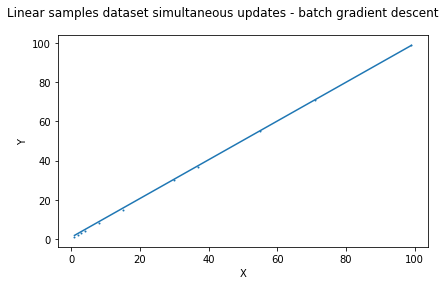

In [109]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Linear samples dataset simultaneous updates - batch gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

We observe a correct parameter convergence and sufficiently correct theta values : the linear regression coefficients follow the linear data distribution and are close to 1. The results are slightly better than the mini-batch gradient descent

1. c. stochastic gradient descent

In [140]:
# stochastic gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):

    #for each epoch, retrieve and train on one random sample
    batch_size = 1
    random_indices = np.random.choice(len(X), batch_size)

    X_batch = X[random_indices]
    y_batch = y_true[random_indices]
    
    t0, t1 = linear_regression_sim(t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.983  theta1 =  4.932
epoch  1  theta0 =  0.970221  theta1 =  4.893663
epoch  2  theta0 =  0.965357116  theta1 =  4.888799116
epoch  3  theta0 =  0.9488365624199999  theta1 =  4.822716901680001
epoch  4  theta0 =  0.9402422920542199  theta1 =  4.805528360948441
epoch  5  theta0 =  0.9354965214012173  theta1 =  4.800782590295438
epoch  6  theta0 =  0.9269594596992252  theta1 =  4.783708466891454
epoch  7  theta0 =  0.9108976663719601  theta1 =  4.719461293582394
epoch  8  theta0 =  0.8951089235312586  theta1 =  4.656306322219588
epoch  9  theta0 =  0.879588589318849  theta1 =  4.59422498536995
epoch  10  theta0 =  0.8751147757441602  theta1 =  4.589751171795261
epoch  11  theta0 =  0.8634704074530303  theta1 =  4.554818066921872
epoch  12  theta0 =  0.8590521189786554  theta1 =  4.550399778447496
epoch  13  theta0 =  0.8546426670812293  theta1 =  4.54599032655007
epoch  14  theta0 =  0.8396040631079478  theta1 =  4.485835910656944
epoch  15  theta0 =  0.835278623134

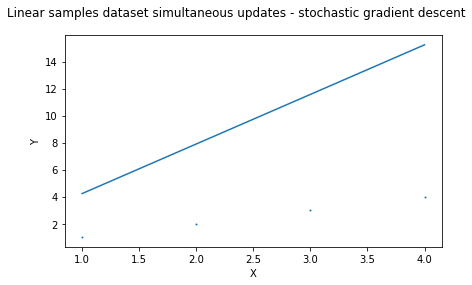

In [141]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Linear samples dataset simultaneous updates - stochastic gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

The results are less satisfying : the model does not converge to expected values (1 and 1)

The best results were observed for the batch gradient descent

2. non-simultaneous updates

We now define the linear regression function using non-simultaneous updates for the gradient descent. Therefore, we update the parameters one by one, first theta 0 and only next theta 1, taking the theta 0 update into account.

In this section we implement and test the same three types of the non-simultaneous update gradient descent on the previously defined dataset : mini-batch (using several random samples from the dataset), batch (using the whole dataset) and stochastic (training on one random sample for each epoch).

Below are the definitions for the linear regression function

In [113]:
def h(x, theta0, theta1):
    #calculate the estimated values
    y_pred = []
    for i in range(len(x)):
        y_pred.append(h_theta(theta0, theta1, x[i]))

    return y_pred

In [142]:
#linear regression function for non-simultaneous update gradient descent
def linear_regression_nsim(param, theta0, theta1, x, y):

    #retrieve the predicted values for current parameter values
    y_pred = h(x, theta0, theta1)

    #non-simultaneous parameter update
    if param == 0: # case where we first update only the first theta parameter
        theta0 = theta0 - alpha * (np.sum(np.array(y_pred) - y) / len(x))
    else: # case where we next update only the second theta parameter
        theta1 = theta1 - alpha * (np.sum((np.array(y_pred) - y) * x) / len(x))

    return theta0, theta1

2. a. mini-batch gradient descent

In [143]:
# mini-batch gradient descent

#create a random batch
batch_size = 5 #size chosen semi-randomly, based on the whole dataset size proportions
random_indices = np.random.choice(len(X), batch_size) # retrieve random samples
X_batch = X[random_indices]
y_batch = y_true[random_indices]

# calculate gradient descent
for i in range(nb_epochs):
    #non-simultaneous parameter update
    t0, t1 = linear_regression_nsim(0, t0, t1, X_batch, y_batch) # update theta 0
    t0, t1 = linear_regression_nsim(1, t0, t1, X_batch, y_batch) # update theta 1 knowing the updated theta 0
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.5490931787784792  theta1 =  3.639109069452821
epoch  1  theta0 =  0.5400989365774517  theta1 =  3.6088783749056828
epoch  2  theta0 =  0.531210426841176  theta1 =  3.5790026150908094
epoch  3  theta0 =  0.5224264080460442  theta1 =  3.5494776223420814
epoch  4  theta0 =  0.5137456532465036  theta1 =  3.5202992779303983
epoch  5  theta0 =  0.5051669499038798  theta1 =  3.4914635114890578
epoch  6  theta0 =  0.4966890997172109  theta1 =  3.462966300445881
epoch  7  theta0 =  0.4883109184560669  theta1 =  3.434803669462006
epoch  8  theta0 =  0.4800312357953324  theta1 =  3.4069716898772713
epoch  9  theta0 =  0.4718488951519298  theta1 =  3.3794664791621107
epoch  10  theta0 =  0.4637627535234591  theta1 =  3.352284200375885
epoch  11  theta0 =  0.4557716813287328  theta1 =  3.325421061631573
epoch  12  theta0 =  0.447874562250183  theta1 =  3.298873315566752
epoch  13  theta0 =  0.44007029307811923  theta1 =  3.272637258820781
epoch  14  theta0 =  0.432357783556814

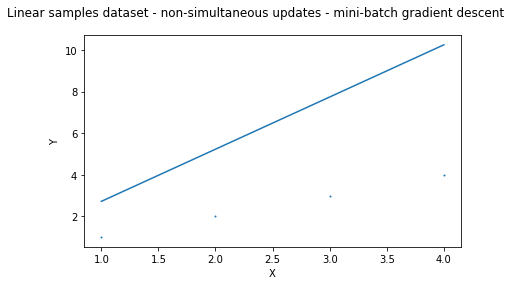

In [144]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Linear samples dataset - non-simultaneous updates - mini-batch gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

We can clearly observe  worse performance using non-simultaneous update comparing to the simultaneous update. The gradient descent does not converge to the exprected values, even if the global trend seems correct

2. b. batch gradient descent

In [145]:
# batch gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):
    #non-simultaneous parameter update
    t0, t1 = linear_regression_nsim(0, t0, t1, X, y_true)
    t0, t1 = linear_regression_nsim(1, t0, t1, X, y_true)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.989  theta1 =  4.9675275
epoch  1  theta0 =  0.97809218125  theta1 =  4.935325813296875
epoch  2  theta0 =  0.9672757745355078  theta1 =  4.90339268026081
epoch  3  theta0 =  0.9565500170603203  theta1 =  4.871725860116203
epoch  4  theta0 =  0.9459141523929695  theta1 =  4.840323130784349
epoch  5  theta0 =  0.9353674304136157  theta1 =  4.809182288727433
epoch  6  theta0 =  0.9249091072613835  theta1 =  4.778301148793823
epoch  7  theta0 =  0.9145384452821376  theta1 =  4.747677544064665
epoch  8  theta0 =  0.9042547129766938  theta1 =  4.717309325701738
epoch  9  theta0 =  0.8940571849494627  theta1 =  4.6871943627966015
epoch  10  theta0 =  0.8839451418575218  theta1 =  4.657330542220984
epoch  11  theta0 =  0.8739178703601118  theta1 =  4.627715768478426
epoch  12  theta0 =  0.8639746630685556  theta1 =  4.598347963557166
epoch  13  theta0 =  0.8541148184965942  theta1 =  4.569225066784246
epoch  14  theta0 =  0.844337641011137  theta1 =  4.540345034680836
ep

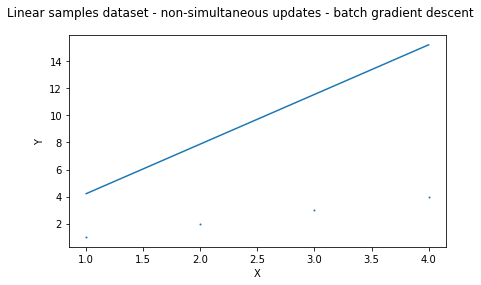

In [146]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Linear samples dataset - non-simultaneous updates - batch gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

The results remain unsufficient comparing to the simultaneous update.

2. c. stochastic gradient descent

In [149]:
# stochastic gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):

    #get a random sample
    batch_size = 1
    random_indices = np.random.choice(len(X), batch_size)

    X_batch = X[random_indices]
    y_batch = y_true[random_indices]
    
    #non-simultaneous parameter update
    t0, t1 = linear_regression_nsim(0, t0, t1, X_batch, y_batch)
    t0, t1 = linear_regression_nsim(1, t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.991  theta1 =  4.982018
epoch  1  theta0 =  0.9860269819999999  theta1 =  4.977049955018
epoch  2  theta0 =  0.9810639050629819  theta1 =  4.972091841157919
epoch  3  theta0 =  0.9681665656344451  theta1 =  4.933438514890595
epoch  4  theta0 =  0.9553980835241389  theta1 =  4.895171374006007
epoch  5  theta0 =  0.9505475140666088  theta1 =  4.890325655117934
epoch  6  theta0 =  0.9418163152423062  theta1 =  4.872880719866978
epoch  7  theta0 =  0.925382976047596  theta1 =  4.807213096444916
epoch  8  theta0 =  0.9092287406857688  theta1 =  4.742660771939054
epoch  9  theta0 =  0.8970915296292659  theta1 =  4.706285550402715
epoch  10  theta0 =  0.8924881525492339  theta1 =  4.701686776699763
epoch  11  theta0 =  0.8804906040665853  theta1 =  4.665730123897265
epoch  12  theta0 =  0.8759443833386215  theta1 =  4.661188449390029
epoch  13  theta0 =  0.8677460620565027  theta1 =  4.644808203468356
epoch  14  theta0 =  0.8559438913840411  theta1 =  4.609437097962989
e

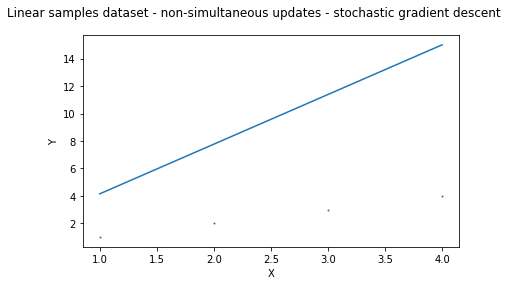

In [150]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Linear samples dataset - non-simultaneous updates - stochastic gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

We observe a similar pattern with the two other non-simultaneous update methods.

For the given dataset we can conclude that the simultaneous parameter update for the gradient descent remains the most accurate solution : we have observed correct results for the batch and mini-batch methods of this update type.

#### Example 2 - few linear samples 

In this section we seek to test all the previous linear regression types on another type of dataset, having much fewer but simpler samples. We seek to observe the defined model's performance on another type of dataset, having less values to be train on.

In [151]:
X = np.array([1, 2, 3, 4]) #a simple, small dataset, following a linear trend
y_true = np.array([1, 2, 3, 4])

#random initial parameter initialization
t0 = 1
t1 = 5

nb_epochs = 50

In the next sections we will repeat the previous tests on the new data

1. simultaneous updates

1. a. mini-batch gradient descent

In [152]:
# mini-batch gradient descent

#create a random batch
batch_size = 2 # based on the current dataset reduced size
random_indices = np.random.choice(len(X), batch_size)
X_batch = X[random_indices]
y_batch = y_true[random_indices]

# calculate gradient descent
for i in range(nb_epochs):
    t0, t1 = linear_regression_sim(t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.985  theta1 =  4.9465
epoch  1  theta0 =  0.9702022499999999  theta1 =  4.8937212500000005
epoch  2  theta0 =  0.955604023375  theta1 =  4.8416540265000005
epoch  3  theta0 =  0.941202630258875  theta1 =  4.790288737086938
epoch  4  theta0 =  0.9269954170488118  theta1 =  4.739615918667445
epoch  5  theta0 =  0.9129797659164269  theta1 =  4.689626235724431
epoch  6  theta0 =  0.899153094325475  theta1 =  4.640310478597168
epoch  7  theta0 =  0.8855128545560594  theta1 =  4.591659561784564
epoch  8  theta0 =  0.8720565332352574  theta1 =  4.54366452227131
epoch  9  theta0 =  0.8587816508740727  theta1 =  4.496316517876595
epoch  10  theta0 =  0.8456857614106305  theta1 =  4.449606825625079
epoch  11  theta0 =  0.832766451759532  theta1 =  4.403526840139828
epoch  12  theta0 =  0.8200213413672831  theta1 =  4.358068072056922
epoch  13  theta0 =  0.8074480817737166  theta1 =  4.313222146461425
epoch  14  theta0 =  0.7950443561793279  theta1 =  4.2689808013444495
epoc

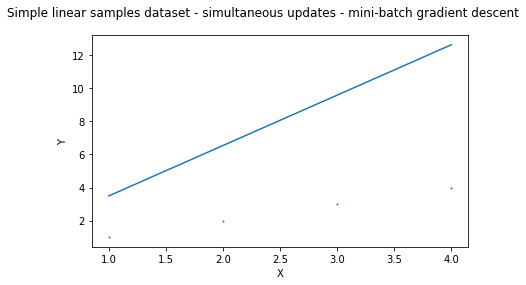

In [153]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Simple linear samples dataset - simultaneous updates - mini-batch gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

1. b. batch gradient descent

In [154]:
# batch gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):
    t0, t1 = linear_regression_sim(t0, t1, X, y_true)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.989  theta1 =  4.9675
epoch  1  theta0 =  0.97809225  theta1 =  4.93527125
epoch  2  theta0 =  0.967275979625  theta1 =  4.903311485000001
epoch  3  theta0 =  0.956550424932875  theta1 =  4.871618458913438
epoch  4  theta0 =  0.9459148283606585  theta1 =  4.840189944409254
epoch  5  theta0 =  0.9353684386712747  theta1 =  4.809023732755283
epoch  6  theta0 =  0.9249105109007152  theta1 =  4.77811763366294
epoch  7  theta0 =  0.9145403063056571  theta1 =  4.747469475133216
epoch  8  theta0 =  0.9042570923115184  theta1 =  4.717077103303953
epoch  9  theta0 =  0.894060142460947  theta1 =  4.686938382298394
epoch  10  theta0 =  0.8839487363627401  theta1 =  4.657051194075004
epoch  11  theta0 =  0.8739221596411898  theta1 =  4.627413438278535
epoch  12  theta0 =  0.8639797038858523  theta1 =  4.598023032092343
epoch  13  theta0 =  0.8541206666017356  theta1 =  4.568877910091937
epoch  14  theta0 =  0.844344351159904  theta1 =  4.539976024099743
epoch  15  theta0 =  0

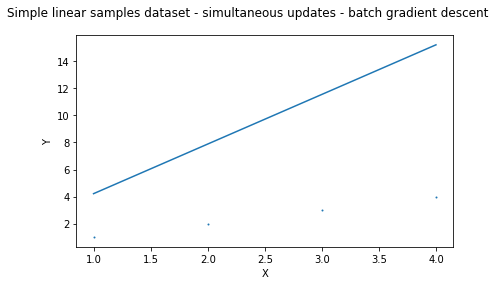

In [155]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Simple linear samples dataset - simultaneous updates - batch gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

1. c. stochastic gradient descent

In [156]:
# stochastic gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):

    #get a random sample
    batch_size = 1
    random_indices = np.random.choice(len(X), batch_size)

    X_batch = X[random_indices]
    y_batch = y_true[random_indices]
    
    t0, t1 = linear_regression_sim(t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.983  theta1 =  4.932
epoch  1  theta0 =  0.9741529999999999  theta1 =  4.914306000000001
epoch  2  theta0 =  0.965350235  theta1 =  4.896700470000001
epoch  3  theta0 =  0.9565914838249999  theta1 =  4.879182967650001
epoch  4  theta0 =  0.940118160470575  theta1 =  4.813289674232301
epoch  5  theta0 =  0.935364752635872  theta1 =  4.808536266397598
epoch  6  theta0 =  0.926812315350441  theta1 =  4.791431391826737
epoch  7  theta0 =  0.918302640251437  theta1 =  4.774412041628729
epoch  8  theta0 =  0.9022866894446707  theta1 =  4.7103482384016635
epoch  9  theta0 =  0.8939637062784227  theta1 =  4.693702272069167
epoch  10  theta0 =  0.8893760403000751  theta1 =  4.689114606090819
epoch  11  theta0 =  0.8737302058354117  theta1 =  4.626531268232166
epoch  12  theta0 =  0.8583503505566477  theta1 =  4.56501184711711
epoch  13  theta0 =  0.8503619765118567  theta1 =  4.549035099027528
epoch  14  theta0 =  0.8424135443372899  theta1 =  4.533138234678394
epoch  15  

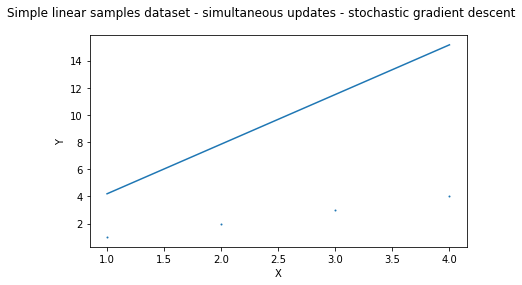

In [157]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Simple linear samples dataset - simultaneous updates - stochastic gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

The results seem to be less satisfying for a regression trained on a small dataset. Even if the samples still follow a linear distribution, the gradient descent converges to less aacurate values comparing to the same convergence performed on a larger dataset. 

2. non-simultaneous parameter updates

2. a. mini-batch gradient descent

In [158]:
# mini-batch gradient descent

#create a random batch
batch_size = 2
random_indices = np.random.choice(len(X), batch_size)
X_batch = X[random_indices]
y_batch = y_true[random_indices]

# calculate gradient descent
for i in range(nb_epochs):
    t0, t1 = linear_regression_nsim(0, t0, t1, X_batch, y_batch)
    t0, t1 = linear_regression_nsim(1, t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.5330210589962248  theta1 =  3.6314831453477985
epoch  1  theta0 =  0.5259093300738591  theta1 =  3.6078007652871578
epoch  2  theta0 =  0.5188639188305674  theta1 =  3.5843372989851403
epoch  3  theta0 =  0.511884211664274  theta1 =  3.561090721414606
epoch  4  theta0 =  0.5049696006490733  theta1 =  3.5380590262809593
epoch  5  theta0 =  0.4981194834827218  theta1 =  3.5152402258488644
epoch  6  theta0 =  0.4913332634346169  theta1 =  3.4926323507705623
epoch  7  theta0 =  0.4846103492942559  theta1 =  3.470233449915777
epoch  8  theta0 =  0.4779501553201722  theta1 =  3.4480415902031925
epoch  9  theta0 =  0.47135210118934406  theta1 =  3.426054856433492
epoch  10  theta0 =  0.464815611947071  theta1 =  3.4042713511239393
epoch  11  theta0 =  0.45834011795731405  theta1 =  3.3826891943444926
epoch  12  theta0 =  0.4519250548534955  theta1 =  3.3613065235554305
epoch  13  theta0 =  0.4455698634897534  theta1 =  3.340121493446485
epoch  14  theta0 =  0.43927398989

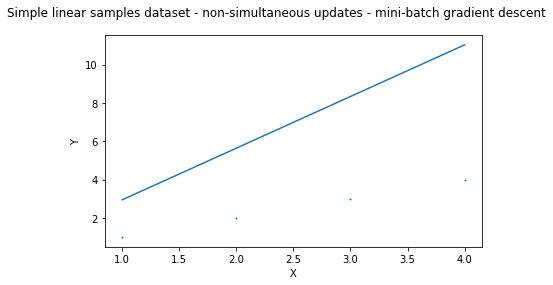

In [159]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Simple linear samples dataset - non-simultaneous updates - mini-batch gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

2. a. batch gradient descent

In [160]:
# batch gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):
    t0, t1 = linear_regression_nsim(0, t0, t1, X, y_true)
    t0, t1 = linear_regression_nsim(1, t0, t1, X, y_true)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.989  theta1 =  4.9675275
epoch  1  theta0 =  0.97809218125  theta1 =  4.935325813296875
epoch  2  theta0 =  0.9672757745355078  theta1 =  4.90339268026081
epoch  3  theta0 =  0.9565500170603203  theta1 =  4.871725860116203
epoch  4  theta0 =  0.9459141523929695  theta1 =  4.840323130784349
epoch  5  theta0 =  0.9353674304136157  theta1 =  4.809182288727433
epoch  6  theta0 =  0.9249091072613835  theta1 =  4.778301148793823
epoch  7  theta0 =  0.9145384452821376  theta1 =  4.747677544064665
epoch  8  theta0 =  0.9042547129766938  theta1 =  4.717309325701738
epoch  9  theta0 =  0.8940571849494627  theta1 =  4.6871943627966015
epoch  10  theta0 =  0.8839451418575218  theta1 =  4.657330542220984
epoch  11  theta0 =  0.8739178703601118  theta1 =  4.627715768478426
epoch  12  theta0 =  0.8639746630685556  theta1 =  4.598347963557166
epoch  13  theta0 =  0.8541148184965942  theta1 =  4.569225066784246
epoch  14  theta0 =  0.844337641011137  theta1 =  4.540345034680836
ep

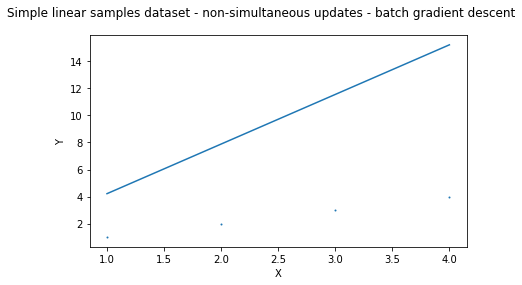

In [161]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Simple linear samples dataset - non-simultaneous updates - batch gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

2. c. stochastic gradient descent

In [162]:
# stochastic gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):

    #get a random sample
    batch_size = 1
    random_indices = np.random.choice(len(X), batch_size)

    X_batch = X[random_indices]
    y_batch = y_true[random_indices]
    
    t0, t1 = linear_regression_nsim(0, t0, t1, X_batch, y_batch)
    t0, t1 = linear_regression_nsim(1, t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.987  theta1 =  4.961039
epoch  1  theta0 =  0.970168844  theta1 =  4.893781700624
epoch  2  theta0 =  0.957517330054128  theta1 =  4.855865113328222
epoch  3  theta0 =  0.9449922173840892  theta1 =  4.818327350656116
epoch  4  theta0 =  0.940228897816049  theta1 =  4.813568794407644
epoch  5  theta0 =  0.9240343937406024  theta1 =  4.748855556122159
epoch  6  theta0 =  0.9193615037907396  theta1 =  4.744187339062246
epoch  7  theta0 =  0.9072095802697621  theta1 =  4.7077680242698765
epoch  8  theta0 =  0.8988868346409525  theta1 =  4.691139178503515
epoch  9  theta0 =  0.894296808627808  theta1 =  4.6865537425163835
epoch  10  theta0 =  0.8860294043341475  theta1 =  4.67003546873765
epoch  11  theta0 =  0.877803303992338  theta1 =  4.653599720254714
epoch  12  theta0 =  0.8732719009680909  theta1 =  4.649072848633492
epoch  13  theta0 =  0.8578023376725888  theta1 =  4.587256473704666
epoch  14  theta0 =  0.8533572788612116  theta1 =  4.5828158599521
epoch  15  t

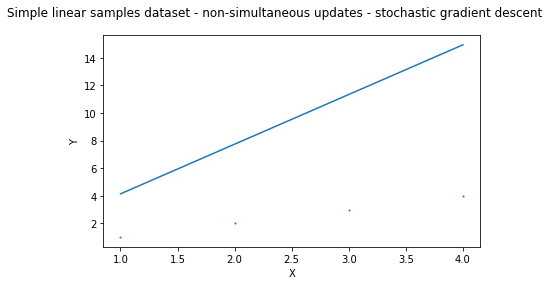

In [163]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Simple linear samples dataset - non-simultaneous updates - stochastic gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

We observe highly similary results comparing to the simultaneous update. 

We can conclude that the dataset size has a relatively high importance for the linear regression and the gradient descent, and this is even more the case for the simultaneous update methods, whose accuracy was more improved on a larger dataset.

#### Example 3 - complex sample distribution, different parameter initialization

In this part we will compare the linear regression with the simultaneous update gradient descent (as far as it gave the most sufficient results) convergence on a more complex data distribution.

For this, we will take a real-world toy dataset of diabetes from scikit-learn and we will test the linear regression with the three simultaneous update gradient descents on this new dataset.

Finally, we will compare the results with the pre-defined linear regression function from scikit-learn library.

In [24]:
from sklearn import datasets
from matplotlib import pyplot as plt

# Load a toy dataset
diabetes = datasets.load_diabetes(as_frame=True)

In [168]:
#extract the data
X = diabetes['data']['bmi']
y_true = diabetes['target']

X.shape, y_true.shape

((442,), (442,))

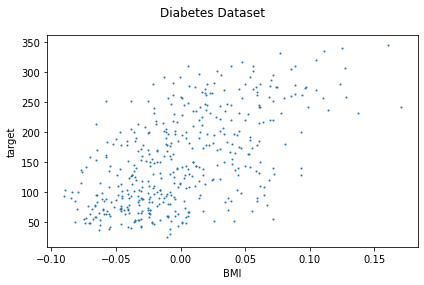

In [169]:
# plot the initial distribution
fig, axs = plt.subplots(1, 1)
fig.suptitle('Diabetes Dataset')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('BMI')
axs.set_ylabel('target')
plt.tight_layout()
plt.show()

We have tested several values of the learning rate. We have observed the most optimal convergence for alpha = 1.

All the tested values before 1 showed a very slow convergence.  The values above 1 showed very innacurate results with a tendency to diverge.

In [215]:
alpha = 1

#random initial parameter initialization
t0 = 12
t1 = 3

nb_epochs = 500

In [216]:
def linear_regression_sim(theta0, theta1, x, y):

    y_pred = []

    #calculate the estimated values
    for i in range(len(x)):
        y_pred.append(h_theta(theta0, theta1, x[i]))

    #simultaneous parameter update
    theta0 = theta0 - alpha * (np.sum(np.array(y_pred) - y) / len(x))
    theta1 = theta1 - alpha * (np.sum((np.array(y_pred) - y) * x) / len(x))

    return theta0, theta1

In [217]:
# mini-batch gradient descent

#create a random batch
batch_size = 50 #randomly chosen based on the dataset size
random_indices = np.random.choice(len(X), batch_size)
X_batch = []
for i in range(len(random_indices)):
    X_batch.append(X[random_indices[i]])

y_batch = y_true[random_indices]

# calculate gradient descent
for i in range(nb_epochs):
    t0, t1 = linear_regression_sim(t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  161.99897593433008  theta1 =  6.767642733086966
epoch  1  theta0 =  161.972572211583  theta1 =  9.473995124989788
epoch  2  theta0 =  161.9536060347786  theta1 =  12.173281719887987
epoch  3  theta0 =  161.93468937523423  theta1 =  14.865469325916274
epoch  4  theta0 =  161.91582246555927  theta1 =  17.550576615603436
epoch  5  theta0 =  161.89700517489624  theta1 =  20.228622209820855
epoch  6  theta0 =  161.87823737274962  theta1 =  22.899624680468097
epoch  7  theta0 =  161.85951892896713  theta1 =  25.563602550601576
epoch  8  theta0 =  161.84084971373886  theta1 =  28.220574294563015
epoch  9  theta0 =  161.82222959759613  theta1 =  30.870558338107553
epoch  10  theta0 =  161.80365845141088  theta1 =  33.513573058531534
epoch  11  theta0 =  161.78513614639465  theta1 =  36.14963678479995
epoch  12  theta0 =  161.7666625540976  theta1 =  38.77876779767355
epoch  13  theta0 =  161.74823754640778  theta1 =  41.4009843298356
epoch  14  theta0 =  161.72986099555015 

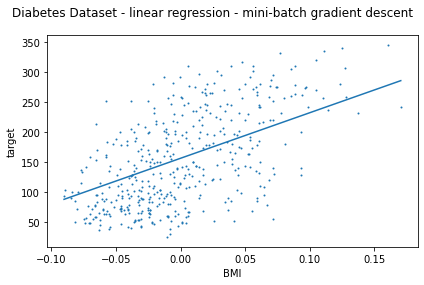

In [218]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Diabetes Dataset - linear regression - mini-batch gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('BMI')
axs.set_ylabel('target')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

In [219]:
# batch gradient descent

#reinitialize the parameters
t0 = 12
t1 = 3

# calculate gradient descent
for i in range(nb_epochs):
    t0, t1 = linear_regression_sim(t0, t1, X, y_true)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  152.13348416289594  theta1 =  5.141256245212846
epoch  1  theta0 =  152.13348416289594  theta1 =  7.277668019282787
epoch  2  theta0 =  152.13348416289594  theta1 =  9.409246282551663
epoch  3  theta0 =  152.13348416289594  theta1 =  11.536001970564275
epoch  4  theta0 =  152.13348416289594  theta1 =  13.657945994124368
epoch  5  theta0 =  152.13348416289594  theta1 =  15.775089239350615
epoch  6  theta0 =  152.13348416289594  theta1 =  17.887442567732457
epoch  7  theta0 =  152.13348416289594  theta1 =  19.99501681618583
epoch  8  theta0 =  152.13348416289594  theta1 =  22.09782279710877
epoch  9  theta0 =  152.13348416289594  theta1 =  24.195871298436856
epoch  10  theta0 =  152.13348416289594  theta1 =  26.28917308369859
epoch  11  theta0 =  152.13348416289594  theta1 =  28.37773889207059
epoch  12  theta0 =  152.13348416289594  theta1 =  30.461579438432697
epoch  13  theta0 =  152.13348416289594  theta1 =  32.54070541342294
epoch  14  theta0 =  152.1334841628959

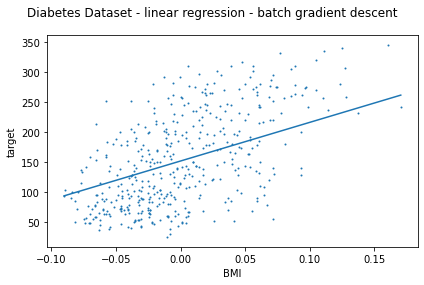

In [220]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Diabetes Dataset - linear regression - batch gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('BMI')
axs.set_ylabel('target')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

In [221]:
# stochastic gradient descent

#reinitialize the parameters
t0 = 12
t1 = 3

#get a random sample
batch_size = 1
random_indices = np.random.choice(len(X), batch_size)
X_batch = []
for i in range(len(random_indices)):
    X_batch.append(X[random_indices[i]])

y_batch = y_true[random_indices]

# calculate gradient descent
for i in range(nb_epochs):
    
    t0, t1 = linear_regression_sim(t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  71.13178813016492  theta1 =  0.4023774030057963
epoch  1  theta0 =  71.01767618852092  theta1 =  0.4073902694787132
epoch  2  theta0 =  71.01789640062066  theta1 =  0.40738059569842533
epoch  3  theta0 =  71.01789597565752  theta1 =  0.4073806143667909
epoch  4  theta0 =  71.01789597647762  theta1 =  0.40738061433076467
epoch  5  theta0 =  71.01789597647603  theta1 =  0.4073806143308346
epoch  6  theta0 =  71.01789597647603  theta1 =  0.4073806143308346
epoch  7  theta0 =  71.01789597647603  theta1 =  0.4073806143308346
epoch  8  theta0 =  71.01789597647603  theta1 =  0.4073806143308346
epoch  9  theta0 =  71.01789597647603  theta1 =  0.4073806143308346
epoch  10  theta0 =  71.01789597647603  theta1 =  0.4073806143308346
epoch  11  theta0 =  71.01789597647603  theta1 =  0.4073806143308346
epoch  12  theta0 =  71.01789597647603  theta1 =  0.4073806143308346
epoch  13  theta0 =  71.01789597647603  theta1 =  0.4073806143308346
epoch  14  theta0 =  71.01789597647603  th

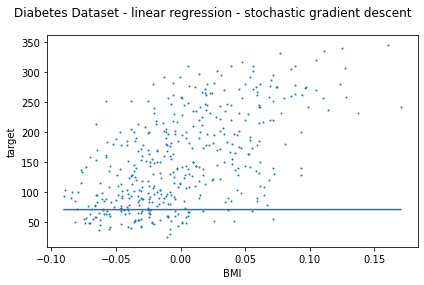

In [222]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Diabetes Dataset - linear regression - stochastic gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('BMI')
axs.set_ylabel('target')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

The results seem visually correct for the first two methods: mini-batch and batch. The stochastic gradient descent, on the other hand, seems to have a very slow convergence.

We will compare now the obtained results with the linear regression function of the scikit-learn library.

In [223]:
from sklearn.linear_model import LinearRegression
#apply the linear regression on our data
reg = LinearRegression().fit(np.array(X).reshape(-1,1), np.array(y_true).reshape(-1,1))
# retrieve the coefficients
intercept = reg.intercept_[0]
coefficients = reg.coef_[0]

# display the equation
equation = f'h(theta) = {intercept:.2f} + {coefficients[0]:.2f} * x'
print(equation)

h(theta) = 152.13 + 949.44 * x


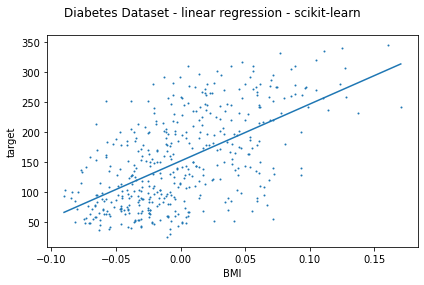

In [224]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Diabetes Dataset - linear regression - scikit-learn')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('BMI')
axs.set_ylabel('target')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, intercept + coefficients * n)
plt.tight_layout()
plt.show()

In conclusion, the batch and mini-batch gradient descent methods seem overall correct applied on complex data comparing to the results of the scikit-learn's linear regression model.  For instance, the theta0 parameter values are nearly perfectly correct.

However, there still remains some inaccuracy even if the global trend remains correct. (theta1 =  759.3 in our model against theta1 = 949.4 in the imported model). This observation stays valid for the simultaneous update gradient descent, which we showed to be the most performant solution.

We have also observed the importance of adapting the learning rate value to the size of the dataset. Different datasets may require a very different learning rate value to obtain a correct linear regression.

## Assignment 2

### Exercise 3

In [1]:
# 1. Install networkX for manipulating graphs in Python
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
# 2. Write a function to compute the graph edit distance between two graphs

def graph_edit_distance(G1, G2):
    total_cost = 0
    cost = 1

    # 1 - Node substitution
    common_nodes = set(G1.nodes) & set(G2.nodes)
    for node in common_nodes:
        if G1[node] != G2[node]:
            total_cost += cost

    # 2 - Node addition
    nodes_only_in_G2 = set(G2.nodes) - set(G1.nodes)
    total_cost += len(nodes_only_in_G2) * cost

    # 3 - Edge addition
    common_edges = set(G1.edges) & set(G2.edges)
    for edge in common_edges:
        if G1[edge[0]][edge[1]] != G2[edge[0]][edge[1]]:
            total_cost += cost
    
    # 4 - Node removal
    nodes_only_in_G1 = set(G1.nodes) - set(G2.nodes)
    total_cost += len(nodes_only_in_G1) * cost

    # 5 - Edge removal
    edges_only_in_G1 = set(G1.edges) - set(G2.edges)
    total_cost += len(edges_only_in_G1) * cost

    # 6 - Edge substitution
    for edge in common_edges:
        if G1[edge[0]][edge[1]] != G2[edge[0]][edge[1]]:
            total_cost += cost

    return total_cost

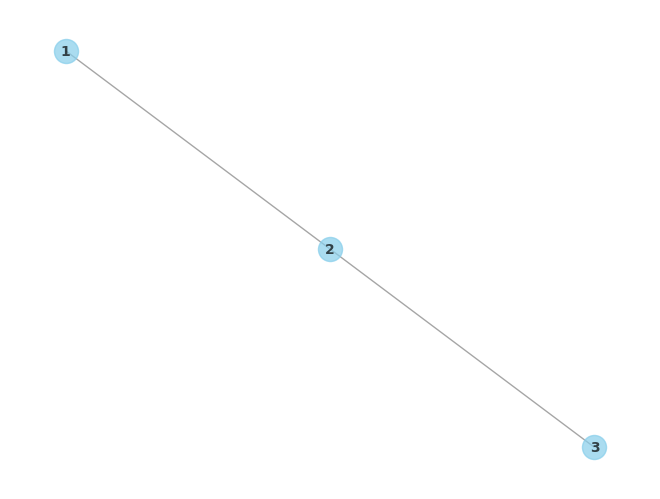

In [2]:
# 3. Provide examples to test the function.
# Creating graph 1
G1 = nx.Graph()
G1.add_node(1)
G1.add_node(2)
G1.add_node(3)

G1.add_edges_from([(1, 2), (2, 3)])

pos = nx.spring_layout(G1)  # You can use other layout algorithms as well
nx.draw(G1, pos, with_labels=True, font_weight='bold', node_color='skyblue', font_color='black', font_size=10, edge_color='gray', linewidths=1, alpha=0.7)

plt.show()

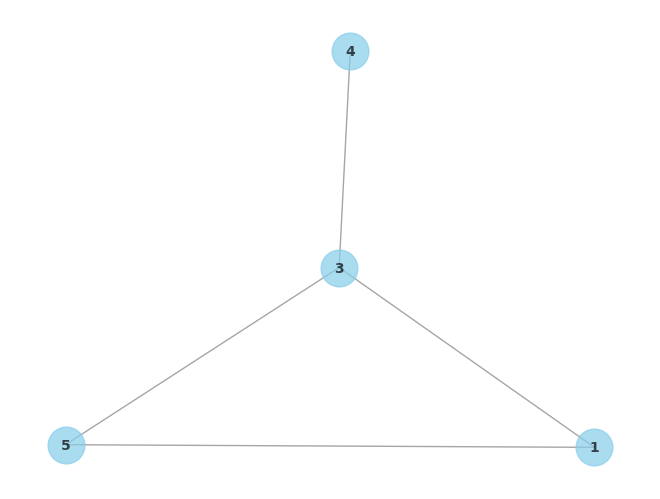

In [3]:
# Creating graph 2
G2 = nx.Graph()
G2.add_node(1)
G2.add_node(5)
G2.add_node(3)
G2.add_node(4)

G2.add_edges_from([(1, 5), (5, 3), (1, 3), (3, 4)])

pos = nx.spring_layout(G2)
nx.draw(G2, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', linewidths=1, alpha=0.7)
plt.show()

In [6]:
graph_edit_distance(G1, G2)

7

### Exercise 4

![alternative text](/Users/thomaspaul/Documents/Polytech/S9/DataMining/TD/TD3/exercise4.jpg)
